In [237]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
#random.seed(4)
#according to fillrate calc other transport qty

In [238]:
# Problem paramters
I=2
J=5
K=10
L=30
M=10
N=5
P=5
R=2
S=2
nvar=4
nobj=2
varmax=150
varmin=50
demand=500
#check

In [239]:
# import random
def generate_numbers():
    numbers = []
    total_sum = 0
    for i in range(nvar-1):
        number = random.randint(1, demand - total_sum - (nvar-1- i))
        numbers.append(number)
        total_sum += number
    numbers.append(demand - total_sum)
    return numbers

# Example usage:


In [ ]:
def generate_random_numbers(min_val, max_val, total_sum, num_elements):
    if total_sum < num_elements * min_val or total_sum > num_elements * max_val:
        raise ValueError("No valid solution exists with the given parameters.")

    remaining_sum = total_sum - num_elements * min_val
    random_numbers = [min_val] * num_elements
    for i in range(remaining_sum):
        idx = random.randint(0, num_elements - 1)
        if random_numbers[idx] < max_val:
            random_numbers[idx] += 1

    return random_numbers

In [240]:
a=np.random.randint(100,150,size=5)
a

array([120, 148, 101, 103, 124])

In [241]:
# import random

# def replace_items_in_list(lst, replace_idx, min_val, max_val):
#     # Save the original sum
#     original_sum = sum(lst)
    
#     # Make a copy of the list so that we don't modify the original list
#     new_lst = lst.copy()
    
#     # Generate new values for the items to be replaced
#     for idx in replace_idx:
#         new_lst[idx] = random.randint(min_val, max_val)
    
#     # Adjust other items if necessary to maintain the original sum
#     while sum(new_lst) != original_sum:
#         if sum(new_lst) < original_sum:
#             idx = random.choice([i for i in range(len(new_lst)) if i not in replace_idx])
#             new_lst[idx] += original_sum - sum(new_lst)
#         else:
#             idx = random.choice([i for i in replace_idx])
#             new_lst[idx] -= sum(new_lst) - original_sum
    
#     return new_lst
# original_lst = [10, 20, 30, 25, 20]
# new_lst = replace_items_in_list(original_lst,[0,2,1], 10, 20)
# print("Original list:", original_lst)
# print("New list:", new_lst)
# print("Sum of original list:", sum(original_lst))
# print("Sum of new list:", sum(new_lst))

In [242]:
# import random

# old_list = [10, 20, 30, 40, 50]

# # set minimum and maximum limits for random numbers
# min_limit = -10
# max_limit = 10

# def replace_with_random(l, min_val, max_val):
#     new_l = l.copy()
#     old_sum = sum(l)
#     while True:
#         replace_idx = random.randint(0, len(l)-1)
#         diff = random.randint(min_val, max_val) - l[replace_idx]
#         new_val = l[replace_idx] + diff
#         if new_val >= min_val and new_val <= max_val:
#             new_l[replace_idx] = new_val
#             new_sum = sum(new_l)
#             if new_sum == old_sum and new_l != l:
#                 return new_l

# new_list=replace_with_random(old_list, 10, 50)
# print("Old List: ", old_list)
# print("New List: ", new_list)
# print("Sum of original list:", sum(old_list))
# print("Sum of new list:", sum(new_list))

In [243]:
# import random

# def replace_two_indices_with_random_numbers(lst, lower, upper):
#     """
#     Replaces two indices in a list with random numbers within a given range,
#     while keeping the sum constant and ensuring that the old and new lists are not the same.
#     """
#     original_val = lst.copy()
#     total_sum = sum(lst)
#     while True:
#         # Choose two indices randomly
#         replace_indices = random.sample(range(len(lst)), 2)
#         # Replace those two indices with random numbers within the specified range
#         new_lst = lst.copy()
#         new_lst[replace_indices[0]] = random.randint(lower, upper)
#         new_lst[replace_indices[1]] = random.randint(lower, upper)
#         # Check if the sum of the new list is equal to the sum of the old list
#         if sum(new_lst) == total_sum:
#             # Check if the old and new lists are not the same
#             if new_lst != original_val:
#                 return new_lst


In [245]:
#Hyper paramters
#alpha
al=0.1
#betta
bn=0.3 #check suspect 0.35
bp=0.3 #check suspect 0.35
br=0.15
bs=0.15
#Gamma
gn=0.9
gp=0.9
gr=0.9
#Monetary gain
scd=0.5
scm=0.4
scr=0.35
scu=0.15
#Product weight
pw=0.450/1000
#Social cost of carbon
co2e=73.45
scc=86
#Maximum desired facilities
maxi=2
maxj=5
maxk=10
maxl=30
maxm=10
maxn=5
maxp=5
maxr=2
maxs=2

In [246]:
#Cost function1
def calc_objective1(lst_pq):
    p_q=round(np.average(lst_pq))#change
    pq_k=[]
    pq_l=[]
    for j in range(len(lst_pq)):
        total_sum=lst_pq[j]
        min_k=round(total_sum/4)
        max_k=round(total_sum/1.5)
        temp=generate_random_numbers(min_k, max_k, total_sum, 2)
        for k in temp:
            pq_k.append(k)
        for l in range(len(temp)):
            total_sum=temp[l]
            min_l=round(total_sum/4)
            max_l=round(total_sum/2)
            temp1=generate_random_numbers(min_l, max_l, total_sum, 3)
            for ll in temp1:
                pq_l.append(ll)
    Yi=np.ones(maxi,dtype=np.int16)
    Yj=np.ones(maxj,dtype=np.int16)
    Yk=np.ones(maxk,dtype=np.int16)
    Yl=np.ones(maxl,dtype=np.int16)
    Ym=np.ones(maxm,dtype=np.int16)
    Yn=np.ones(maxn,dtype=np.int16)
    Yp=np.ones(maxp,dtype=np.int16)
    Yr=np.ones(maxr,dtype=np.int16)
    Ys=np.ones(maxs,dtype=np.int16)
    #parameters
    pci=np.random.randint(100,150,size=I)
    #fixed cost
    fcj=np.random.randint(10000,150000,size=J)
    fck=np.random.randint(5000,10000,size=K)
    fcl=np.random.randint(5000,10000,size=L)
    fcm=np.random.randint(5000,10000,size=M)
    fcn=np.random.randint(5000,10000,size=N)
    fcp=np.random.randint(5000,10000,size=P)
    fcr=np.random.randint(5000,10000,size=R)
    fcs=np.random.randint(5000,10000,size=S)
    #fill rate assumption
    fill_j=1
    fill_k=0.99
    fill_l=0.95
    #variable cost (manufacturing cost)
    mcj=np.random.randint(10,150,size=J)
    #Inventory cost
    invj=np.random.randint(10,15,size=J)
    invk=np.random.randint(15,25,size=K)
    invl=np.random.randint(20,50,size=L)
    invm=np.random.randint(20,50,size=M)
    invn=np.random.randint(20,50,size=N)
    invp=np.random.randint(20,50,size=P)
    invr=np.random.randint(15,25,size=R)
    invs=np.random.randint(10,15,size=S)
    #Transportation cost
    tcij=np.random.randint(10,15,size=(I,J))
    tcjk=np.random.randint(10,15,size=(J,K))
    tckl=np.random.randint(10,15,size=(K,L))
    tclm=np.random.randint(10,15,size=(L,M))
    tcmn=np.random.randint(10,15,size=(M,N))
    tcmp=np.random.randint(10,15,size=(M,P))
    tcmr=np.random.randint(10,15,size=(M,R))
    tcms=np.random.randint(10,15,size=(M,S))
    tcns=np.random.randint(10,15,size=(N,S))
    tcps=np.random.randint(10,15,size=(P,S))
    tcrs=np.random.randint(10,15,size=(R,S))
    tcri=np.random.randint(10,15,size=(R,I))
    tcpj=np.random.randint(10,15,size=(P,J))
    tcnk=np.random.randint(10,15,size=(N,K))

    #Time present in the inventory
    invtj=np.random.randint(10,15,size=J)
    invtk=np.random.randint(15,25,size=K)
    invtl=np.random.randint(20,50,size=L)
    invtm=np.random.randint(20,50,size=M)
    invtn=np.random.randint(20,50,size=N)
    invtp=np.random.randint(20,50,size=P)
    invtr=np.random.randint(15,25,size=R)
    invts=np.random.randint(10,15,size=S)
    #Fixed job oppurtunities
    fjj=np.random.randint(500,1000,size=J)
    fjk=np.random.randint(100,150,size=K)
    fjl=np.random.randint(100,150,size=L)
    fjm=np.random.randint(100,150,size=M)
    fjn=np.random.randint(100,150,size=N)
    fjp=np.random.randint(100,150,size=P)
    fjr=np.random.randint(100,150,size=R)
    fjs=np.random.randint(100,150,size=S)
    #Variable job oppurtunities
    vjj=np.random.randint(50,100,size=J)
    vjk=np.random.randint(10,15,size=K)
    vjl=np.random.randint(10,15,size=L)
    vjm=np.random.randint(10,15,size=M)
    vjn=np.random.randint(10,15,size=N)
    vjp=np.random.randint(10,15,size=P)
    vjr=np.random.randint(10,15,size=R)
    vjs=np.random.randint(10,15,size=S)
    #Capacity
    pj=np.random.randint(15,25,size=J)
    pk=np.random.randint(50,100,size=K)
    pl=np.random.randint(50,100,size=L)
    pm=np.random.randint(50,100,size=M)
    pn=np.random.randint(50,100,size=N)
    pp=np.random.randint(50,100,size=P)
    pr=np.random.randint(50,100,size=R)
    ps=np.random.randint(50,100,size=S)
    #Distance between facilities
    dij=np.random.randint(1000,1500,size=(I,J))
    djk=np.random.randint(100,150,size=(J,K))
    dkl=np.random.randint(70,120,size=(K,L))
    dlm=np.random.randint(50,75,size=(L,M))
    dmn=np.random.randint(50,75,size=(M,N))
    dmp=np.random.randint(100,150,size=(M,P))
    dmr=np.random.randint(100,150,size=(M,R))
    dms=np.random.randint(100,150,size=(M,S))
    dns=np.random.randint(100,150,size=(N,S))
    dps=np.random.randint(100,150,size=(P,S))
    drs=np.random.randint(100,150,size=(R,S))
    dri=np.random.randint(100,150,size=(R,I))
    dpj=np.random.randint(100,150,size=(P,J))
    dnk=np.random.randint(100,150,size=(N,K))

    #Qty_transported
    pq_jk=np.zeros((J,K),dtype=np.int32)
    a=0
    for i in range(len(lst_pq)):
        for j in range(i*2,(i*2)+2):
            pq_jk[i][j]=pq_k[a]
            a+=1
    pq_kl=np.zeros((K,L),dtype=np.int32)
    a=0
    for i in range(len(pq_k)):
        for j in range(i*3,(i*3)+3):
            pq_kl[i][j]=pq_l[a]
            a+=1
    # pq_lm=np.zeros((L,M),dtype=np.int32)
    #cost paramters calc
    zfc=0
    for i in range(maxi):
        zfc+=fcj[i]*Yi[i]
    for j in range(maxj):
        zfc+=fcj[j]*Yj[j]
    for k in range(maxk):
        zfc+=fcn[k]*Yk[k]
    for l in range(maxl):
        zfc+=fcn[l]*Yl[l]
    for m in range(maxm):
        zfc+=fcn[m]*Ym[m]
    for n in range(maxn):
        zfc+=fcn[n]*Yn[n]
    for p in range(maxp):
        zfc+=fcp[p]*Yp[p]
    for r in range(maxr):
        zfc+=fcr[r]*Yr[r]
    for s in range(maxs):
        zfc+=fcs[s]*Ys[s]
    #purchasing cost
    zpc=0
    for i in range(maxi):
        zpc+=pci[i]*Yi[i]*p_q
    #mfg cost
    zmc=0
    for i in range(maxj):
        zmc+=mcj[i]*Yj[i]*p_q
    #inv
    zinv=0
    for i in range(maxj):
        zinv+=invj[i]*invtj[i]*Yj[i]*lst_pq[i]*fill_j
    for i in range(maxk):
        zinv+=invk[i]*invtk[i]*Yk[i]*pq_k[i]*fill_k
    for i in range(maxl):
        zinv+=invl[i]*invtl[i]*Yl[i]*pq_l[i]*fill_l
    for i in range(maxm):
        zinv+=invm[i]*invtm[i]*Ym[i]*p_q*al*fill_j*fill_k*fill_l
    for i in range(maxn):
        zinv+=invn[i]*invtn[i]*Yn[i]*p_q*al*bn*fill_j*fill_k*fill_l
    for i in range(maxp):
        zinv+=invp[i]*invtp[i]*Yp[i]*p_q*al*bp*fill_j*fill_k*fill_l
    for i in range(maxr):
        zinv+=invr[i]*invtr[i]*Yr[i]*p_q*al*br*fill_j*fill_k*fill_l
    for i in range(maxs):
        zinv+=invs[i]*invts[i]*Ys[i]*p_q*al*bs*(3-(gn+gp+gr))*fill_j*fill_k*fill_l
    #tc
    ztc=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            ztc+=tcij[temp1][temp2]*dij[temp1][temp2]*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            ztc+=tcjk[temp1][temp2]*djk[temp1][temp2]*pq_jk[temp1][temp2]*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            ztc+=tckl[temp1][temp2]*dkl[temp1][temp2]*pq_kl[temp1][temp2]*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            ztc+=tclm[temp1][temp2]*dlm[temp1][temp2]*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            ztc+=tcmn[temp1][temp2]*dmn[temp1][temp2]*p_q*Ym[temp1]*Yn[temp2]*al*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            ztc+=tcmp[temp1][temp2]*dmp[temp1][temp2]*p_q*Ym[temp1]*Yp[temp2]*al*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            ztc+=tcmr[temp1][temp2]*dmr[temp1][temp2]*p_q*Ym[temp1]*Yr[temp2]*al*br*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            ztc+=tcms[temp1][temp2]*dms[temp1][temp2]*p_q*Ym[temp1]*Ys[temp2]*al*bs*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            ztc+=tcrs[temp1][temp2]*drs[temp1][temp2]*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            ztc+=tcps[temp1][temp2]*dps[temp1][temp2]*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            ztc+=tcns[temp1][temp2]*dns[temp1][temp2]*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            ztc+=tcns[temp1][temp2]*dnk[temp1][temp2]*p_q*Yn[temp1]*Yk[temp2]*al*gn*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            ztc+=tcpj[temp1][temp2]*dpj[temp1][temp2]*p_q*Yp[temp1]*Yj[temp2]*al*gp*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            ztc+=tcri[temp1][temp2]*dri[temp1][temp2]*p_q*Yr[temp1]*Yi[temp2]*al*gr*br*fill_j*fill_k*fill_l
    #Monetry savings due to reselling
    zscd=0
    for i in range(maxn):
        for j in range(maxk):
            zscd+=scd*(gn*p_q*fill_j*fill_k*fill_l*al*bn*Yn[i]*Yk[j])
    zscm=0
    for i in range(maxp):
        for j in range(maxj):
            zscm+=scm*(gp*p_q*fill_j*fill_k*fill_l*al*bp*Yp[i]*Yj[j])
    zscr=0
    for i in range(maxr):
        for j in range(maxi):
            zscr+=scr*(gr*p_q*fill_j*fill_k*fill_l*al*br*Yr[i]*Yi[j])
    #Co2 emission
    zco2ec=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dij[temp1][temp2]*pw*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*djk[temp1][temp2]*pw*pq_jk[temp1][temp2]*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            zco2ec+=co2e*scc*dkl[temp1][temp2]*pw*pq_kl[temp1][temp2]*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            zco2ec+=co2e*scc*dlm[temp1][temp2]*pw*p_q*Yl[temp1]*Ym[temp2]*al*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            zco2ec+=co2e*scc*dmn[temp1][temp2]*pw*p_q*Ym[temp1]*Yn[temp2]*al*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            zco2ec+=co2e*scc*dmp[temp1][temp2]*pw*p_q*Ym[temp1]*Yp[temp2]*al*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            zco2ec+=co2e*scc*dmr[temp1][temp2]*pw*p_q*Ym[temp1]*Yr[temp2]*al*br*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dms[temp1][temp2]*pw*p_q*Ym[temp1]*Ys[temp2]*al*bs*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*drs[temp1][temp2]*pw*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dps[temp1][temp2]*pw*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dns[temp1][temp2]*pw*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*dnk[temp1][temp2]*pw*p_q*Yn[temp1]*Yk[temp2]*al*gn*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dpj[temp1][temp2]*pw*p_q*Yp[temp1]*Yj[temp2]*al*gp*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            zco2ec+=co2e*scc*dri[temp1][temp2]*pw*p_q*Yr[temp1]*Yi[temp2]*al*gr*fill_j*fill_k*fill_l
    #selling waste
    zsw=scu*p_q*fill_j*fill_k*fill_l*al*bs*(3-(gn+gp+gr))
    #Social paramters
    zfj=0
    for i in range(maxi):
        zfj+=fjj[i]*Yi[i]
    for j in range(maxj):
        zfj+=fjj[j]*Yj[j]
    for k in range(maxk):
        zfj+=fjn[k]*Yk[k]
    for l in range(maxl):
        zfj+=fjn[l]*Yl[l]
    for m in range(maxm):
        zfj+=fjn[m]*Ym[m]
    for n in range(maxn):
        zfj+=fjn[n]*Yn[n]
    for p in range(maxp):
        zfj+=fjp[p]*Yp[p]
    for r in range(maxr):
        zfj+=fjr[r]*Yr[r]
    for s in range(maxs):
        zfj+=fjs[s]*Ys[s]
    zvj=0
    for j in range(maxj):
        zvj+=vjj[j]*p_q*fill_j/pj[j]
    for k in range(maxk):
        zvj+=vjn[k]*p_q*fill_k/pk[k]
    for l in range(maxl):
        zvj+=vjn[l]*p_q*fill_l/pl[l]
    for m in range(maxm):
        zvj+=vjn[m]*p_q*al/pm[m]
    for n in range(maxn):
        zvj+=vjn[n]*p_q*al*bn/pn[n]
    for p in range(maxp):
        zvj+=vjp[p]*p_q*al*bp/pp[p]
    for r in range(maxr):
        zvj+=vjr[r]*p_q*al*br/pr[r]
    for s in range(maxs):
        zvj+=vjs[s]*p_q*al*bs*(3-(gn+gp+gr))/ps[s]
    z1=zfc+zpc+zmc+zinv+ztc-zscd-zscm-zscr+zco2ec-zsw
    z2=zfj+zvj
    return z1

In [247]:
#Cost function2
def calc_objective2(lst_pq):
    p_q=round(np.average(lst_pq))#change
    pq_k=[]
    pq_l=[]
    for j in range(len(lst_pq)):
        total_sum=lst_pq[j]
        min_k=round(total_sum/4)
        max_k=round(total_sum/1.5)
        temp=generate_random_numbers(min_k, max_k, total_sum, 2)
        for k in temp:
            pq_k.append(k)
        for l in range(len(temp)):
            total_sum=temp[l]
            min_l=round(total_sum/4)
            max_l=round(total_sum/2)
            temp1=generate_random_numbers(min_l, max_l, total_sum, 3)
            for ll in temp1:
                pq_l.append(ll)
    Yi=np.ones(maxi,dtype=np.int16)
    Yj=np.ones(maxj,dtype=np.int16)
    Yk=np.ones(maxk,dtype=np.int16)
    Yl=np.ones(maxl,dtype=np.int16)
    Ym=np.ones(maxm,dtype=np.int16)
    Yn=np.ones(maxn,dtype=np.int16)
    Yp=np.ones(maxp,dtype=np.int16)
    Yr=np.ones(maxr,dtype=np.int16)
    Ys=np.ones(maxs,dtype=np.int16)
    #parameters
    pci=np.random.randint(100,150,size=I)
    #fixed cost
    fcj=np.random.randint(10000,150000,size=J)
    fck=np.random.randint(5000,10000,size=K)
    fcl=np.random.randint(5000,10000,size=L)
    fcm=np.random.randint(5000,10000,size=M)
    fcn=np.random.randint(5000,10000,size=N)
    fcp=np.random.randint(5000,10000,size=P)
    fcr=np.random.randint(5000,10000,size=R)
    fcs=np.random.randint(5000,10000,size=S)
    #fill rate assumption
    fill_j=1
    fill_k=0.99
    fill_l=0.95
    #variable cost (manufacturing cost)
    mcj=np.random.randint(10,150,size=J)
    #Inventory cost
    invj=np.random.randint(10,15,size=J)
    invk=np.random.randint(15,25,size=K)
    invl=np.random.randint(20,50,size=L)
    invm=np.random.randint(20,50,size=M)
    invn=np.random.randint(20,50,size=N)
    invp=np.random.randint(20,50,size=P)
    invr=np.random.randint(15,25,size=R)
    invs=np.random.randint(10,15,size=S)
    #Transportation cost
    tcij=np.random.randint(10,15,size=(I,J))
    tcjk=np.random.randint(10,15,size=(J,K))
    tckl=np.random.randint(10,15,size=(K,L))
    tclm=np.random.randint(10,15,size=(L,M))
    tcmn=np.random.randint(10,15,size=(M,N))
    tcmp=np.random.randint(10,15,size=(M,P))
    tcmr=np.random.randint(10,15,size=(M,R))
    tcms=np.random.randint(10,15,size=(M,S))
    tcns=np.random.randint(10,15,size=(N,S))
    tcps=np.random.randint(10,15,size=(P,S))
    tcrs=np.random.randint(10,15,size=(R,S))
    tcri=np.random.randint(10,15,size=(R,I))
    tcpj=np.random.randint(10,15,size=(P,J))
    tcnk=np.random.randint(10,15,size=(N,K))

    #Time present in the inventory
    invtj=np.random.randint(10,15,size=J)
    invtk=np.random.randint(15,25,size=K)
    invtl=np.random.randint(20,50,size=L)
    invtm=np.random.randint(20,50,size=M)
    invtn=np.random.randint(20,50,size=N)
    invtp=np.random.randint(20,50,size=P)
    invtr=np.random.randint(15,25,size=R)
    invts=np.random.randint(10,15,size=S)
    #Fixed job oppurtunities
    fjj=np.random.randint(500,1000,size=J)
    fjk=np.random.randint(100,150,size=K)
    fjl=np.random.randint(100,150,size=L)
    fjm=np.random.randint(100,150,size=M)
    fjn=np.random.randint(100,150,size=N)
    fjp=np.random.randint(100,150,size=P)
    fjr=np.random.randint(100,150,size=R)
    fjs=np.random.randint(100,150,size=S)
    #Variable job oppurtunities
    vjj=np.random.randint(50,100,size=J)
    vjk=np.random.randint(10,15,size=K)
    vjl=np.random.randint(10,15,size=L)
    vjm=np.random.randint(10,15,size=M)
    vjn=np.random.randint(10,15,size=N)
    vjp=np.random.randint(10,15,size=P)
    vjr=np.random.randint(10,15,size=R)
    vjs=np.random.randint(10,15,size=S)
    #Capacity
    pj=np.random.randint(15,25,size=J)
    pk=np.random.randint(50,100,size=K)
    pl=np.random.randint(50,100,size=L)
    pm=np.random.randint(50,100,size=M)
    pn=np.random.randint(50,100,size=N)
    pp=np.random.randint(50,100,size=P)
    pr=np.random.randint(50,100,size=R)
    ps=np.random.randint(50,100,size=S)
    #Distance between facilities
    dij=np.random.randint(1000,1500,size=(I,J))
    djk=np.random.randint(100,150,size=(J,K))
    dkl=np.random.randint(70,120,size=(K,L))
    dlm=np.random.randint(50,75,size=(L,M))
    dmn=np.random.randint(50,75,size=(M,N))
    dmp=np.random.randint(100,150,size=(M,P))
    dmr=np.random.randint(100,150,size=(M,R))
    dms=np.random.randint(100,150,size=(M,S))
    dns=np.random.randint(100,150,size=(N,S))
    dps=np.random.randint(100,150,size=(P,S))
    drs=np.random.randint(100,150,size=(R,S))
    dri=np.random.randint(100,150,size=(R,I))
    dpj=np.random.randint(100,150,size=(P,J))
    dnk=np.random.randint(100,150,size=(N,K))

    #Qty_transported
    pq_jk=np.zeros((J,K),dtype=np.int32)
    a=0
    for i in range(len(lst_pq)):
        for j in range(i*2,(i*2)+2):
            pq_jk[i][j]=pq_k[a]
            a+=1
    pq_kl=np.zeros((K,L),dtype=np.int32)
    a=0
    for i in range(len(pq_k)):
        for j in range(i*3,(i*3)+3):
            pq_kl[i][j]=pq_l[a]
            a+=1
    # pq_lm=np.zeros((L,M),dtype=np.int32)
    #cost paramters calc
    zfc=0
    for i in range(maxi):
        zfc+=fcj[i]*Yi[i]
    for j in range(maxj):
        zfc+=fcj[j]*Yj[j]
    for k in range(maxk):
        zfc+=fcn[k]*Yk[k]
    for l in range(maxl):
        zfc+=fcn[l]*Yl[l]
    for m in range(maxm):
        zfc+=fcn[m]*Ym[m]
    for n in range(maxn):
        zfc+=fcn[n]*Yn[n]
    for p in range(maxp):
        zfc+=fcp[p]*Yp[p]
    for r in range(maxr):
        zfc+=fcr[r]*Yr[r]
    for s in range(maxs):
        zfc+=fcs[s]*Ys[s]
    #purchasing cost
    zpc=0
    for i in range(maxi):
        zpc+=pci[i]*Yi[i]*p_q
    #mfg cost
    zmc=0
    for i in range(maxj):
        zmc+=mcj[i]*Yj[i]*p_q
    #inv
    zinv=0
    for i in range(maxj):
        zinv+=invj[i]*invtj[i]*Yj[i]*lst_pq[i]*fill_j
    for i in range(maxk):
        zinv+=invk[i]*invtk[i]*Yk[i]*pq_k[i]*fill_k
    for i in range(maxl):
        zinv+=invl[i]*invtl[i]*Yl[i]*pq_l[i]*fill_l
    for i in range(maxm):
        zinv+=invm[i]*invtm[i]*Ym[i]*p_q*al*fill_j*fill_k*fill_l
    for i in range(maxn):
        zinv+=invn[i]*invtn[i]*Yn[i]*p_q*al*bn*fill_j*fill_k*fill_l
    for i in range(maxp):
        zinv+=invp[i]*invtp[i]*Yp[i]*p_q*al*bp*fill_j*fill_k*fill_l
    for i in range(maxr):
        zinv+=invr[i]*invtr[i]*Yr[i]*p_q*al*br*fill_j*fill_k*fill_l
    for i in range(maxs):
        zinv+=invs[i]*invts[i]*Ys[i]*p_q*al*bs*(3-(gn+gp+gr))*fill_j*fill_k*fill_l
    #tc
    ztc=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            ztc+=tcij[temp1][temp2]*dij[temp1][temp2]*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            ztc+=tcjk[temp1][temp2]*djk[temp1][temp2]*pq_jk[temp1][temp2]*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            ztc+=tckl[temp1][temp2]*dkl[temp1][temp2]*pq_kl[temp1][temp2]*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            ztc+=tclm[temp1][temp2]*dlm[temp1][temp2]*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            ztc+=tcmn[temp1][temp2]*dmn[temp1][temp2]*p_q*Ym[temp1]*Yn[temp2]*al*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            ztc+=tcmp[temp1][temp2]*dmp[temp1][temp2]*p_q*Ym[temp1]*Yp[temp2]*al*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            ztc+=tcmr[temp1][temp2]*dmr[temp1][temp2]*p_q*Ym[temp1]*Yr[temp2]*al*br*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            ztc+=tcms[temp1][temp2]*dms[temp1][temp2]*p_q*Ym[temp1]*Ys[temp2]*al*bs*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            ztc+=tcrs[temp1][temp2]*drs[temp1][temp2]*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            ztc+=tcps[temp1][temp2]*dps[temp1][temp2]*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            ztc+=tcns[temp1][temp2]*dns[temp1][temp2]*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            ztc+=tcns[temp1][temp2]*dnk[temp1][temp2]*p_q*Yn[temp1]*Yk[temp2]*al*gn*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            ztc+=tcpj[temp1][temp2]*dpj[temp1][temp2]*p_q*Yp[temp1]*Yj[temp2]*al*gp*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            ztc+=tcri[temp1][temp2]*dri[temp1][temp2]*p_q*Yr[temp1]*Yi[temp2]*al*gr*br*fill_j*fill_k*fill_l
    #Monetry savings due to reselling
    zscd=0
    for i in range(maxn):
        for j in range(maxk):
            zscd+=scd*(gn*p_q*fill_j*fill_k*fill_l*al*bn*Yn[i]*Yk[j])
    zscm=0
    for i in range(maxp):
        for j in range(maxj):
            zscm+=scm*(gp*p_q*fill_j*fill_k*fill_l*al*bp*Yp[i]*Yj[j])
    zscr=0
    for i in range(maxr):
        for j in range(maxi):
            zscr+=scr*(gr*p_q*fill_j*fill_k*fill_l*al*br*Yr[i]*Yi[j])
    #Co2 emission
    zco2ec=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dij[temp1][temp2]*pw*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*djk[temp1][temp2]*pw*pq_jk[temp1][temp2]*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            zco2ec+=co2e*scc*dkl[temp1][temp2]*pw*pq_kl[temp1][temp2]*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            zco2ec+=co2e*scc*dlm[temp1][temp2]*pw*p_q*Yl[temp1]*Ym[temp2]*al*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            zco2ec+=co2e*scc*dmn[temp1][temp2]*pw*p_q*Ym[temp1]*Yn[temp2]*al*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            zco2ec+=co2e*scc*dmp[temp1][temp2]*pw*p_q*Ym[temp1]*Yp[temp2]*al*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            zco2ec+=co2e*scc*dmr[temp1][temp2]*pw*p_q*Ym[temp1]*Yr[temp2]*al*br*fill_j*fill_k*fill_l
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dms[temp1][temp2]*pw*p_q*Ym[temp1]*Ys[temp2]*al*bs*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*drs[temp1][temp2]*pw*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dps[temp1][temp2]*pw*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dns[temp1][temp2]*pw*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn*fill_j*fill_k*fill_l
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*dnk[temp1][temp2]*pw*p_q*Yn[temp1]*Yk[temp2]*al*gn*fill_j*fill_k*fill_l
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dpj[temp1][temp2]*pw*p_q*Yp[temp1]*Yj[temp2]*al*gp*fill_j*fill_k*fill_l
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            zco2ec+=co2e*scc*dri[temp1][temp2]*pw*p_q*Yr[temp1]*Yi[temp2]*al*gr*fill_j*fill_k*fill_l
    #selling waste
    zsw=scu*p_q*fill_j*fill_k*fill_l*al*bs*(3-(gn+gp+gr))
    #Social paramters
    zfj=0
    for i in range(maxi):
        zfj+=fjj[i]*Yi[i]
    for j in range(maxj):
        zfj+=fjj[j]*Yj[j]
    for k in range(maxk):
        zfj+=fjn[k]*Yk[k]
    for l in range(maxl):
        zfj+=fjn[l]*Yl[l]
    for m in range(maxm):
        zfj+=fjn[m]*Ym[m]
    for n in range(maxn):
        zfj+=fjn[n]*Yn[n]
    for p in range(maxp):
        zfj+=fjp[p]*Yp[p]
    for r in range(maxr):
        zfj+=fjr[r]*Yr[r]
    for s in range(maxs):
        zfj+=fjs[s]*Ys[s]
    zvj=0
    for j in range(maxj):
        zvj+=vjj[j]*p_q*fill_j/pj[j]
    for k in range(maxk):
        zvj+=vjn[k]*p_q*fill_k/pk[k]
    for l in range(maxl):
        zvj+=vjn[l]*p_q*fill_l/pl[l]
    for m in range(maxm):
        zvj+=vjn[m]*p_q*al/pm[m]
    for n in range(maxn):
        zvj+=vjn[n]*p_q*al*bn/pn[n]
    for p in range(maxp):
        zvj+=vjp[p]*p_q*al*bp/pp[p]
    for r in range(maxr):
        zvj+=vjr[r]*p_q*al*br/pr[r]
    for s in range(maxs):
        zvj+=vjs[s]*p_q*al*bs*(3-(gn+gp+gr))/ps[s]
    z1=zfc+zpc+zmc+zinv+ztc-zscd-zscm-zscr+zco2ec-zsw
    z2=zfj+zvj
    return z2

In [248]:
# #Non dominated sorting
# def NonDominatedSorting(pop):
#     npop=len(pop)
#     for i in range(npop):
#         dominatedset=[]
#         dominatedcount=0
#     for i in range(npop):
#         for j in range(i,npop):
#             p=pop(i)
#             q=pop(j)
#             if 



In [249]:
# SEO Paramters
maxit=100
alpha=0.9
betta=0.7
num_c=50

In [250]:
# Initialization
persons={'Position':[],'Cost1':[],'Cost2': []}
'''{'Position': [], 'Cost1': [],'Cost2': [], 'Rank': [], 'DominationSet': [], 'DominatedCount': [], 'CrowdingDistance': []}'''

"{'Position': [], 'Cost1': [],'Cost2': [], 'Rank': [], 'DominationSet': [], 'DominatedCount': [], 'CrowdingDistance': []}"

In [251]:
# import random

# def generate_numbers(min_value, max_value,total_sum):
#     total_sum=0
#     a = []
#     for i in range(4):
#         min_val = max(min_value, total_sum - max_value * (4 - i))
#         max_val = min(max_value, total_sum - min_value * (4 - i))
#         number = random.randint(min_val, max_val)
#         a.append(number)
#         total_sum += number
#     a.append(demand - total_sum)

# Example usage:
# min_value = 1
# max_value = 300
# total_sum = 0
# numbers = generate_numbers(min_value, max_value, total_sum)
# print(numbers)


In [252]:
# import random

# def generate_random_numbers(min_val, max_val, total_sum, num_elements):
#     # Define an initial list of numbers with the minimum value
#     random_numbers = [min_val] * num_elements
#     # Subtract the total sum by the sum of the initial numbers
#     remaining_sum = total_sum - (min_val * num_elements)

#     # Randomly distribute the remaining sum to the numbers
#     for i in range(remaining_sum):
#         index = random.randint(0, num_elements - 1)
#         random_numbers[index] += 1

#     return random_numbers

# # Define the minimum and maximum limits for the random numbers
# min_val = 50
# max_val = 100

# # Define the target sum and number of elements
# total_sum = 500
# num_elements = 5

# # Generate random numbers that satisfy the criteria
# random_numbers = generate_random_numbers(min_val, max_val, total_sum, num_elements)

# # Print the result
# print("Random numbers:", random_numbers)


In [253]:
# import random

# def generate_random_numbers(min_val, max_val, total_sum, num_elements):
#     # Calculate the minimum sum and maximum sum that can be achieved
#     min_sum = min_val * num_elements
#     max_sum = max_val * num_elements

#     # Check if the target sum is within the valid range
#     if total_sum < min_sum or total_sum > max_sum:
#         raise ValueError(f"Invalid target sum. Must be between {min_sum} and {max_sum}.")

#     # Define an initial list of numbers with the minimum value
#     random_numbers = [min_val] * num_elements
#     # Subtract the total sum by the sum of the initial numbers
#     remaining_sum = total_sum - (min_val * num_elements)

#     # Randomly distribute the remaining sum to the numbers
#     for i in range(remaining_sum):
#         index = random.randint(0, num_elements - 1)
#         # Increment the number at the randomly selected index by 1
#         # but don't exceed the maximum value
#         if random_numbers[index] < max_val:
#             random_numbers[index] += 1

#     return random_numbers

# # Define the minimum and maximum limits for the random numbers
# min_val = 50
# max_val = 150

# # Define the target sum and number of elements
# total_sum = 500
# num_elements = 5

# # Generate random numbers that satisfy the criteria
# random_numbers = generate_random_numbers(min_val, max_val, total_sum, num_elements)

# # Print the result
# print("Random numbers:", random_numbers)
# print("SUM",sum(random_numbers))


In [254]:
# working perfect
# def generate_random_numbers(min_val, max_val, total_sum, num_elements):
#     if total_sum < num_elements * min_val or total_sum > num_elements * max_val:
#         raise ValueError("No valid solution exists with the given parameters.")

#     remaining_sum = total_sum - num_elements * min_val
#     random_numbers = [min_val] * num_elements
#     for i in range(remaining_sum):
#         idx = random.randint(0, num_elements - 1)
#         if random_numbers[idx] < max_val:
#             random_numbers[idx] += 1

#     return random_numbers

# Example usage:
# min_val = 90
# max_val = 110
# total_sum = 500
# num_elements = 5

# random_numbers = generate_random_numbers(min_val, max_val, total_sum, num_elements)
# print(random_numbers)
# print(sum(random_numbers))

In [255]:

for i in range(2):
    # a = []
    random_numbers = generate_random_numbers(varmin, varmax, demand, nvar)
    # a.append(random_numbers)
    ##persons['Cost'].append(calc_objective(temp))
    persons['Position'].append(random_numbers)
    persons['Cost1'].append(calc_objective1(random_numbers))
    persons['Cost2'].append(calc_objective2(random_numbers))
persons_df=pd.DataFrame(persons)
print(persons_df)

                   Position         Cost1        Cost2
0   [100, 95, 93, 105, 107]  1.208454e+07 -5775.291889
1  [102, 103, 106, 88, 101]  1.208454e+07 -5775.291889


In [256]:
gamma=round(nvar*alpha)
#tetta=np.zeros((nobj,gamma),dtype=np.int32)
#sigma=0.1*varmax
# bestsol_index=attacker_index
# bestcost1=np.zeros((maxit,1),dtype=np.int64)
# bestcost2=np.zeros((maxit,1),dtype=np.int64)
# paretocost=np.zeros((maxit,1),dtype=np.int64)

In [257]:
#connect functions
def connect_1(a_index,d_index,betta,varmin,varmax):
    #connect 1 working
    a=random.random()
    b=np.sin(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y=[]
    for i in range(len(x1)):
        c=round(x2[i]*(1-b)+((x1[i]+x2[i])/2)*b)
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    balance=sum(y)-demand
    if balance>0:
        for i in range(1,balance+1):
            max_index=y.index(max(y))
            y[max_index]-=1
        return y
    elif balance<0:
        balance=abs(balance)
        for i in range(1,balance+1):
            min_index=y.index(min(y))
            y[min_index]+=1
        return y
    else:
        return y
def connect_2(a_index,d_index,betta,varmin,varmax):
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    y1=[]
    y2=[]
    for i in range(len(x1)):
        c=round((x1[i]*(1-b))+(((x1[i]+x2[i])/2)*b))
        cc=round(x2[i]*((1-bb))+((x1[i]+x2[i])/2)*bb)
        z=max(c,varmin)
        z=min(z,varmax)
        y1.append(z)
        z=max(cc,varmin)
        z=min(z,varmax)
        y2.append(z)
    balance=sum(y1)-demand
    if balance>0:
        for i in range(1,balance+1):
            max_index=y1.index(max(y1))
            y1[max_index]-=1
    elif balance<0:
        balance=abs(balance)
        for i in range(1,balance+1):
            min_index=y1.index(min(y1))
            y1[min_index]+=1
    else:
        pass
    balance=sum(y2)-demand
    if balance>0:
        for i in range(1,balance+1):
            max_index=y2.index(max(y2))
            y2[max_index]-=1
    elif balance<0:
        balance=abs(balance)
        for i in range(1,balance+1):
            min_index=y2.index(min(y2))
            y2[min_index]+=1
    else:
        pass
    return [y1,y2]
def connect_3(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y=[]
    for i in range(len(x1)):
        c=round(x2[i]*((1-b))+(((x1[i]*bb)+x2[i])/2)*b)
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    balance=sum(y)-demand
    if balance>0:
        for i in range(1,balance+1):
            max_index=y.index(max(y))
            y[max_index]-=1
        return y
    elif balance<0:
        balance=abs(balance)
        for i in range(1,balance+1):
            min_index=y.index(min(y))
            y[min_index]+=1
        return y
    else:
        return y
def connect_4(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y=[]
    for i in range(len(x1)):
        c=round((x2[i]*(1-b))+((((x2[i]*bb)+x1[i])/2)*b))
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    balance=sum(y)-demand
    if balance>0:
        for i in range(1,balance+1):
            max_index=y.index(max(y))
            y[max_index]-=1
        return y
    elif balance<0:
        balance=abs(balance)
        for i in range(1,balance+1):
            min_index=y.index(min(y))
            y[min_index]+=1
        return y
    else:
        return y   

In [258]:
np.sin(0.2)

0.19866933079506122

In [259]:
# # attacker_index=[x for x in range(2) if persons_df['Cost1'].iloc[x]<=persons_df['Cost2'].iloc[x]]
for i in range(2):
    for j in range(2):
        if i==j:
            continue
        if persons_df.iloc[i,1]<=persons_df.iloc[j,1]:
            attacker_index=i
        else:
            attacker_index=j
if attacker_index==0:
    defender_index=1
else:
    defender_index=0
print(attacker_index,defender_index)

1 0


In [260]:
persons_df.iloc[attacker_index,0]

[102, 103, 106, 88, 101]

In [261]:
persons_df.iloc[defender_index,0]

[100, 95, 93, 105, 107]

In [262]:
att_lst1=[]
def_lst1=[]
a=copy.deepcopy(persons_df.iloc[attacker_index,0])
att_lst1.append(a)
a=copy.deepcopy(persons_df.iloc[defender_index,0])
def_lst1.append(a)
print(att_lst1,def_lst1)

[[102, 103, 106, 88, 101]] [[100, 95, 93, 105, 107]]


In [263]:
def replace_random_indices(arr, num_indices, min_val, max_val):
    n = len(arr)
    if num_indices > n:
        raise ValueError("Number of indices to replace should be less than or equal to length of array.")
    indices = set(random.sample(range(n), num_indices))
    new_arr = arr.copy()
    while True:
        sum_old = sum(arr[i] for i in indices)
        sum_new = 0
        for i in indices:
            val = random.randint(min_val, max_val)
            new_arr[i] = val
            sum_new += val
        if sum_new == sum_old:
            if new_arr != arr:
                return new_arr
        else:
            new_arr = arr.copy()

In [264]:
# SEO main loop
paretoposition=[]
paretocost1=[]
paretocost2=[]
sno=[]
att_lst=[]
def_lst=[]
for it in range(2,maxit+1):
    a=copy.deepcopy(persons_df.iloc[attacker_index,0])
    att_lst.append(a)
    a=copy.deepcopy(persons_df.iloc[defender_index,0])
    def_lst.append(a)
    new_defender=replace_random_indices(persons_df.iloc[attacker_index,0],gamma,varmin,varmax)
    # print(new_defender)
    # print(persons_df.iloc[defender_index,0])
        #print(new_defender[temp])
        # curr_def_cost1=calc_objective1(curr_defender)
        # curr_def_cost2=calc_objective2(curr_defender)
        #Calc cost
    #     for j in range(nobj):
    #         tetta[j][i]= 
    #         #current ddefender cost - calc cost of trained defender
    #     tetta[0][i]+=tetta[1][i]
    # [value,index]=[max(tetta[0]),tetta[0].index(max(tetta[0]))]
    # print(new_defender)
    if  calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender)<=calc_objective2(persons_df.iloc[defender_index,0]):
        #### persons_df.iloc[defender_index,0]=new_defender
        for xyz in range(nvar):
            persons_df.iloc[defender_index,0][xyz]=new_defender[xyz]
    # Spotting a attack
    for j in range(num_c):
        temp=random.randint(1,5)
        if temp==1:
            new_defender=connect_1(attacker_index,defender_index,betta,varmin,varmax)
        elif temp==2:
            [new_defender1,new_defender2]=connect_2(attacker_index,defender_index,betta,varmin,varmax)
            if  calc_objective1(new_defender1)<=calc_objective1(new_defender2) or calc_objective2(new_defender1)<=calc_objective2(new_defender2):
                new_defender=new_defender1
                #persons_df['Position'].iloc[defender_index]=
            #calculate cost of both new defenders then take best out of it
            else:
                new_defender=new_defender2
        elif temp==3:
            new_defender=connect_3(attacker_index,defender_index,betta,varmin,varmax)
        else:
            new_defender=connect_4(attacker_index,defender_index,betta,varmin,varmax)
    # Responding to  SE attack
    if calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender) <= calc_objective2(persons_df.iloc[defender_index,0]):
        if calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[attacker_index,0]) or calc_objective2(new_defender) <= calc_objective2(persons_df.iloc[attacker_index,0]):
            ### persons_df.iloc[attacker_index,0]=new_defender
            for xyz in range(nvar):
                persons_df.iloc[attacker_index,0][xyz]=new_defender[xyz]
        else:
            ### persons_df.iloc[defender_index,0]=new_defender
            for xyz in range(nvar):
                persons_df.iloc[defender_index,0][xyz]=new_defender[xyz]
    # elif <= or <=:
    #     ParetoCost(it)=new_defender #check can be combined with above
    elif calc_objective1(new_defender)>=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender) >= calc_objective2(persons_df.iloc[defender_index,0]):
        if calc_objective1(persons_df.iloc[defender_index,0])<=calc_objective1(persons_df.iloc[attacker_index,0]) or calc_objective2(persons_df.iloc[defender_index,0]) <= calc_objective2(persons_df.iloc[attacker_index,0]):
            ### persons_df.iloc[attacker_index,0]=persons_df.iloc[defender_index,0]
            for xyz in range(nvar):
                persons_df.iloc[attacker_index,0][xyz]=persons_df.iloc[defender_index,0][xyz]
    else:
        print("ERROR")
    
    att=copy.deepcopy(persons_df.iloc[attacker_index,0])
    paretoposition.append(att)
    paretocost=calc_objective1(persons_df.iloc[attacker_index,0])
    paretocost1.append(paretocost)
    paretocost=calc_objective2(persons_df.iloc[attacker_index,0])
    paretocost2.append(paretocost)
    print("Iteration no. ",it)
    sno.append(it)
    # new random defender
bestcost1=min(paretocost1)
bestcost2=min(paretocost2)
# print(bestcost1,bestcost2)

Iteration no.  2
Iteration no.  3
Iteration no.  4
Iteration no.  5
Iteration no.  6
Iteration no.  7
Iteration no.  8
Iteration no.  9
Iteration no.  10
Iteration no.  11
Iteration no.  12
Iteration no.  13
Iteration no.  14
Iteration no.  15
Iteration no.  16
Iteration no.  17
Iteration no.  18
Iteration no.  19
Iteration no.  20
Iteration no.  21
Iteration no.  22
Iteration no.  23
Iteration no.  24
Iteration no.  25
Iteration no.  26
Iteration no.  27
Iteration no.  28
Iteration no.  29
Iteration no.  30
Iteration no.  31
Iteration no.  32
Iteration no.  33
Iteration no.  34
Iteration no.  35
Iteration no.  36
Iteration no.  37
Iteration no.  38
Iteration no.  39
Iteration no.  40
Iteration no.  41
Iteration no.  42
Iteration no.  43
Iteration no.  44
Iteration no.  45
Iteration no.  46
Iteration no.  47
Iteration no.  48
Iteration no.  49
Iteration no.  50
Iteration no.  51
Iteration no.  52
Iteration no.  53
Iteration no.  54
Iteration no.  55
Iteration no.  56
Iteration no.  57


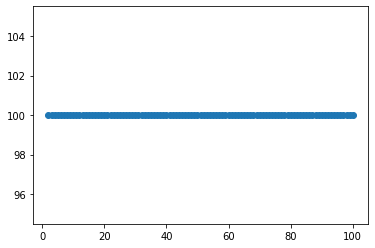

In [265]:
temp=[]
for i in paretoposition:
    temp.append(np.average(i))
plt.scatter(sno,temp)
plt.show()

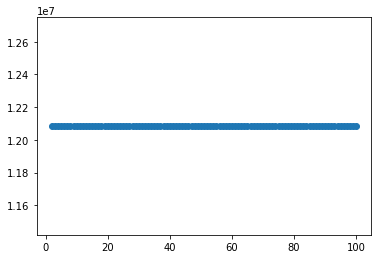

In [266]:
plt.scatter(sno,paretocost1)
plt.show()

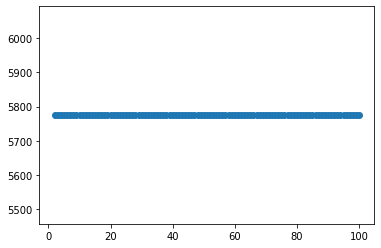

In [267]:
temp=[]
for i in paretocost2:
    temp.append(abs(i))
plt.scatter(sno,temp)
plt.show()

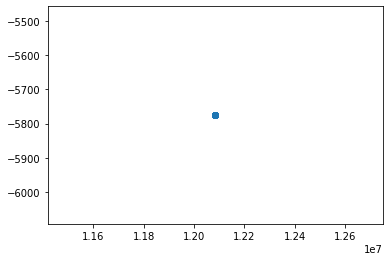

In [268]:
plt.scatter(paretocost1,paretocost2)
plt.show()

In [269]:
#print(att_lst)

In [270]:
#print(def_lst)

In [271]:
persons_df.iloc[attacker_index,0]

[90, 90, 89, 111, 120]

In [272]:
#persons_df['Position'].iloc[attacker_index]=1

In [273]:
# a=[1,2,3,4,5]
# for i in range(len(a)):
#     persons_df.iloc[attacker_index,0][i]=a[i]

In [274]:
#persons_df.iloc[attacker_index,0]=persons_df.iloc[defender_index,0]

In [275]:
persons_df.iloc[attacker_index,0]

[90, 90, 89, 111, 120]

In [276]:
persons_df.iloc[defender_index,0]

[94, 71, 74, 126, 135]

In [277]:
# persons_df.to_csv("F:\Downloads\projexport.csv")

In [278]:
# for j in range(10):
#     temp=round(random.uniform(1,4))
#     if temp==1:
#         print(temp,"one")
#     elif temp==2:
#         print(temp)
#     elif temp==3:
#         print(temp)
#     else:
#         print(temp)

In [279]:
persons_df['Position'].iloc[1][0]

90

In [280]:
# a=[[0, 0, 0, 0, 0, 0, 0],[1,1,1,1,1,1,1]]
# # for i in range(1):
# #     print(sum(a[:][i]))
# a[0][i]+=a[1][i]
# print(a)
# [value,index]=[max(a[0]),a[0].index(max(a[0]))]
# print(value)


In [281]:
# print(tetta*2)

In [282]:
# a=np.ones(5,dtype=np.int16)
# a[1]*a[2]


In [283]:
# a=max([2,3,4],5)
# a

In [284]:
x1=[1,2,3,4]
x2=[4,3,2,1]
random.seed(1)
a=random.random()
b=np.sin(0.9)*a
print(a,b)
y=[]
varmax=3
varmin=2
for i in x1:
    for j in x2:
        c=i*((1-b)+(i+j)/2)*b
        print(c)
        z=max(c,varmin)
        print(z)
        z=min(z,varmax)
        print(z)
        y.append(z)

0.13436424411240122 0.10525112810500004
0.357301148400125
2
2
0.304675584347625
2
2
0.25205002029512497
2
2
0.19942445624262495
2
2
0.81985342490525
2
2
0.71460229680025
2
2
0.60935116869525
2
2
0.5041000405902499
2
2
1.3876568295153748
2
2
1.229780137357875
2
2
1.071903445200375
2
2
0.914026753042875
2
2
2.0607113622305
2.0607113622305
2.0607113622305
1.8502091060205
2
2
1.6397068498105
2
2
1.4292045936005
2
2


In [285]:
print(y)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0607113622305, 2, 2, 2]


In [286]:
max(0.357301148400125,2)

2